In [0]:
from zipfile import ZipFile
from random import randint
file_name="/content/ML_Dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()


In [2]:
import pandas as pd
def load(file):
  column_name = ['engine_id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                    's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                    's15', 's16', 's17', 's18', 's19', 's20', 's21']
  filename="/content/ML_Dataset/"+file
  data = pd.read_table(filename, header=None, delim_whitespace=True)
  data.columns = column_name
  return data
data=load("train_FD004.txt")
temp=pd.DataFrame(data=data,columns=['engine_id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                    's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                    's15', 's16', 's17', 's18', 's19', 's20', 's21'])
temp.head()

,engine_id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,2211.86,8311.32,1.01,41.69,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,2323.66,8713.60,1.07,43.94,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,2211.92,8306.69,1.01,41.66,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,2211.88,8312.35,1.02,41.68,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,1915.22,7994.94,0.93,36.48,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754


In [3]:
temp.describe()

,engine_id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000
mean,124.325181,134.311417,23.999823,0.571347,94.031576,472.882435,579.420056,1417.896600,1201.915359,8.031626,11.589457,283.328633,2228.686034,8524.673301,1.096445,42.874529,266.735665,2334.427590,8067.811812,9.285604,0.023252,347.760029,2228.613283,97.751396,20.864333,12.518995
std,71.995350,89.783389,14.780722,0.310703,14.251954,26.436832,37.342647,106.167598,119.327591,3.622872,5.444017,146.880210,145.348243,336.927547,0.127681,3.243492,138.479109,128.197859,85.670543,0.750374,0.004685,27.808283,145.472491,5.369424,9.936396,5.962697
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.480000,1242.670000,1024.420000,3.910000,5.670000,136.170000,1914.720000,7984.510000,0.930000,36.040000,128.310000,2027.570000,7845.780000,8.175700,0.020000,302.000000,1915.000000,84.930000,10.160000,6.084300
25%,60.000000,62.000000,10.004600,0.250700,100.000000,445.000000,549.330000,1350.550000,1119.490000,3.910000,5.720000,142.920000,2211.950000,8320.590000,1.020000,41.760000,134.520000,2387.910000,8062.630000,8.648000,0.020000,330.000000,2212.000000,100.000000,10.940000,6.566100
50%,126.000000,123.000000,25.001400,0.700000,100.000000,462.540000,555.740000,1367.680000,1136.920000,7.050000,9.030000,194.960000,2223.070000,8362.760000,1.030000,42.330000,183.450000,2388.060000,8083.810000,9.255600,0.020000,334.000000,2223.000000,100.000000,14.930000,8.960100
75%,185.000000,191.000000,41.998100,0.840000,100.000000,491.190000,607.070000,1497.420000,1302.620000,10.520000,15.480000,394.280000,2323.930000,8777.250000,1.260000,45.220000,371.400000,2388.170000,8128.350000,9.365800,0.030000,368.000000,2324.000000,100.000000,28.560000,17.135500
max,249.000000,543.000000,42.008000,0.842000,100.000000,518.670000,644.420000,1613.000000,1440.770000,14.620000,21.610000,570.810000,2388.640000,9196.810000,1.320000,48.360000,537.490000,2390.490000,8261.650000,11.066300,0.030000,399.000000,2388.000000,100.000000,39.890000,23.885200


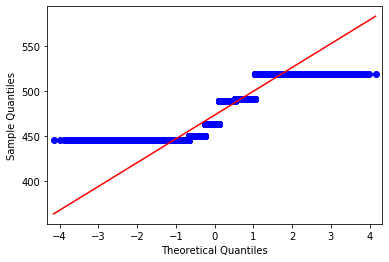

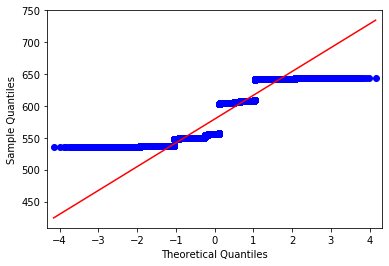

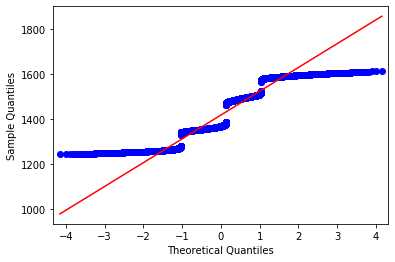

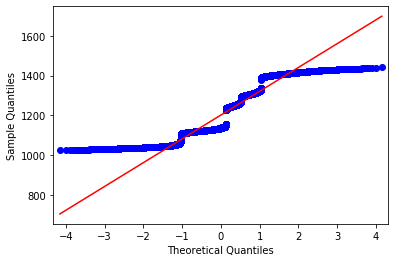

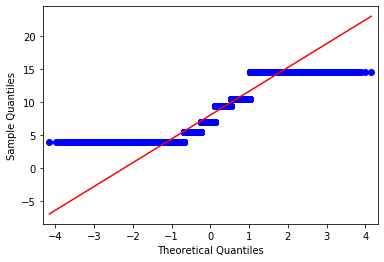

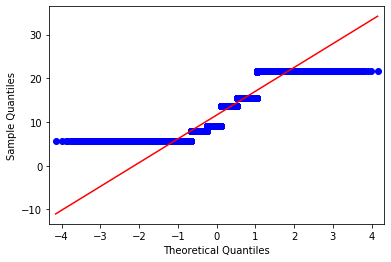

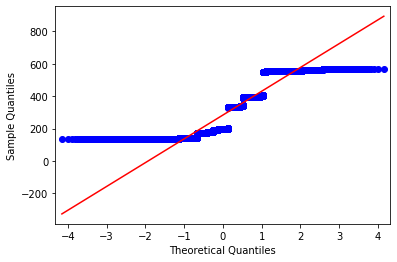

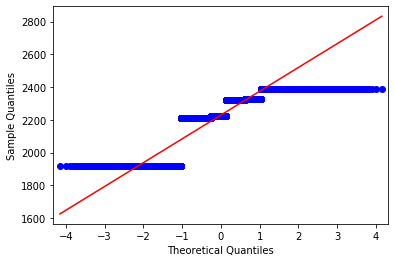

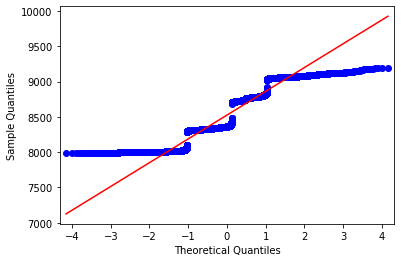

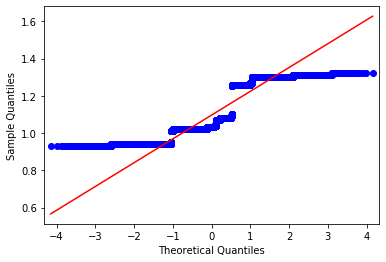

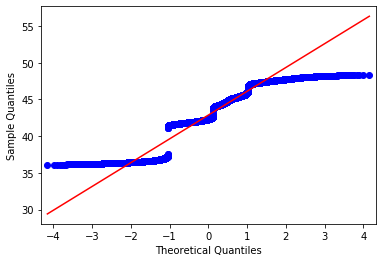

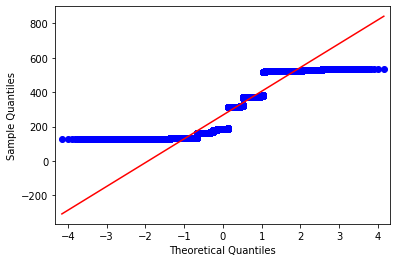

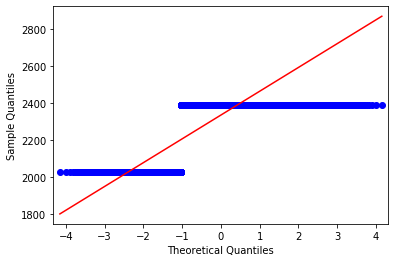

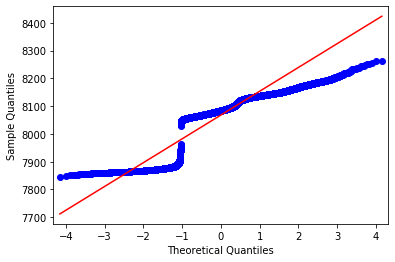

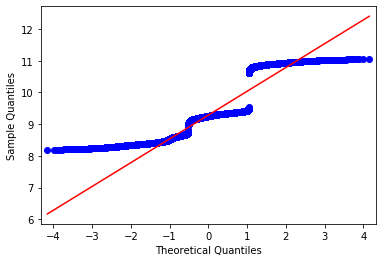

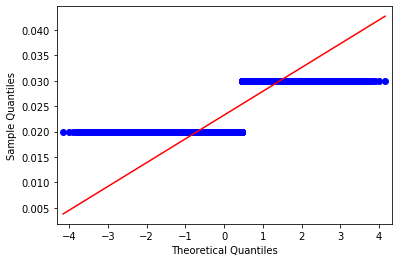

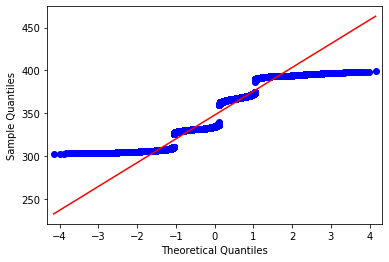

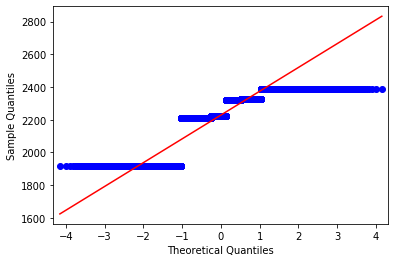

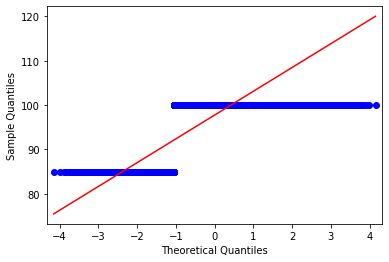

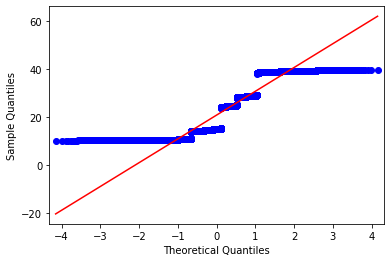

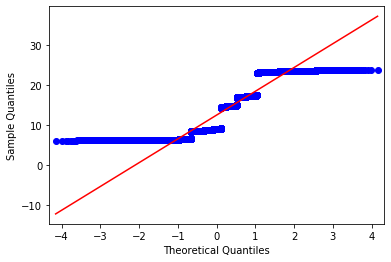

In [4]:
import matplotlib.pyplot as plt
x=pd.DataFrame(data=data[['s1', 's2', 's3',
                    's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                    's15', 's16', 's17', 's18', 's19', 's20', 's21']],columns=['s1', 's2', 's3',
                    's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                    's15', 's16', 's17', 's18', 's19', 's20', 's21'])
from statsmodels.graphics.gofplots import qqplot
for each in x.keys():
    qqplot(x[each],line='s')
    plt.show()

In [5]:
!pip install pykalman
from pykalman import KalmanFilter
for cols in data.columns:
    if cols == 'engine_id' or cols == 'cycle' or cols == 'setting1' or cols == 'setting2' or cols == 'setting3':
        continue;
    if cols == 'cycle':
        continue;
    else:
        kf = KalmanFilter(transition_matrices = [1],
                      observation_matrices = [1],
                      initial_state_mean = data[cols].values[0],
                      initial_state_covariance = 1,
                      observation_covariance=1,
                      transition_covariance=.01)
        state_means,_ = kf.filter(data[cols].values)
        data[cols] = state_means.flatten()

     |████████████████████████████████| 235kB 3.0MB/s 
  Created wheel for pykalman: filename=pykalman-0.9.5-cp36-none-any.whl size=48464 sha256=a6b0dfbdae5ee3c6f80bde730c0d12cbcead569d47837a85701b5a250c112035
  Stored in directory: /root/.cache/pip/wheels/d9/e8/6a/553d9832679cb74a8434fa597c3abdb07313e40054a0adf9ac
Successfully built pykalman


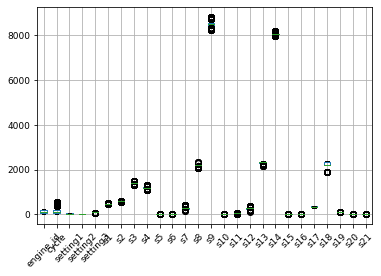

In [6]:
boxplot=temp.boxplot(column=['engine_id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                    's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                    's15', 's16', 's17', 's18', 's19', 's20', 's21'],rot=45,fontsize=9)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(copy='true')
scaler.fit(temp)
temp_scaled=pd.DataFrame(data=scaler.transform(temp),columns=temp.columns)

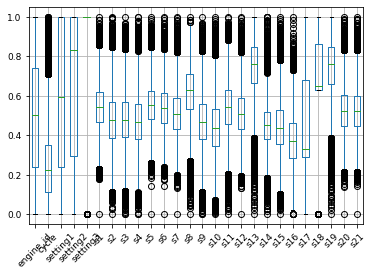

In [8]:
boxplot=temp_scaled.boxplot(column=['engine_id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                    's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                    's15', 's16', 's17', 's18', 's19', 's20', 's21'],rot=45,fontsize=9)

In [9]:
Q1 = temp_scaled.quantile(0.25)
Q3 = temp_scaled.quantile(0.75)
IQR = Q3-Q1

print(temp_scaled.shape)
df_dup = temp_scaled[~((temp_scaled < (Q1 - 1.5 * IQR)) |(temp_scaled > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_dup.shape)
# boxplot=df_dup.boxplot(column=['engine_id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
#                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
#                     's15', 's16', 's17', 's18', 's19', 's20', 's21'],rot=45,fontsize=9)
# print(boxplot)


(61249, 26)
(50160, 26)


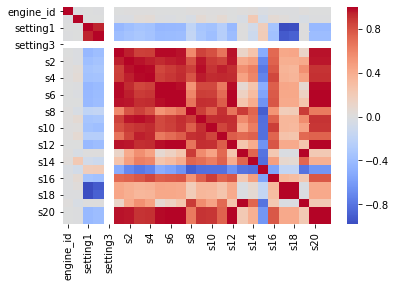

In [10]:
data=df_dup
import seaborn as sns
correlation=data.corr(method ='pearson')
sns.heatmap(correlation, cmap='coolwarm')

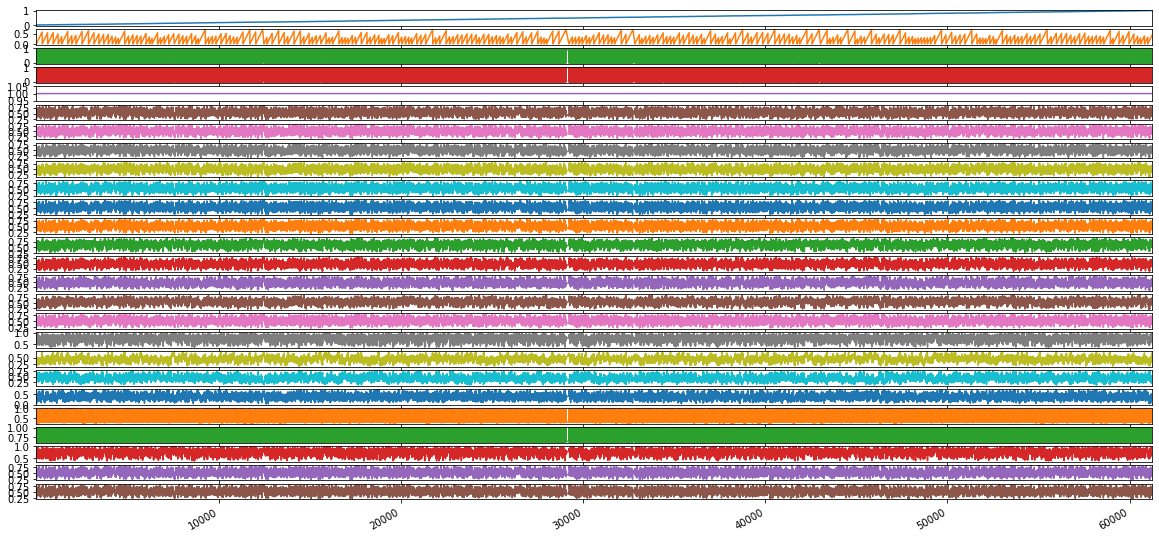

In [11]:
from matplotlib import pyplot
data.plot(subplots=True, legend=False,figsize=(20,10))
pyplot.show()

In [0]:
def new_labels(data, labels):
    ct_ids = []
    ct_times = []
    ct_labels = []
    data = data.copy()
    data['RUL'] = labels
    gb = data.groupby(['engine_id'])
    for engine_no_df in gb:
        instances = engine_no_df[1].shape[0]
        r = randint(5, instances - 1)
        ct_ids.append(engine_no_df[1].iloc[r,:]['engine_id'])
        ct_times.append(engine_no_df[1].iloc[r,:]['time'])
        ct_labels.append(engine_no_df[1].iloc[r,:]['RUL'])
    ct = pd.DataFrame({'engine_id': ct_ids,
                       'cutoff_time': ct_times,
                       'RUL': ct_labels})
    ct = ct[['engine_id', 'cutoff_time', 'RUL']]
    ct.index = ct['engine_id']
    ct.index = ct.index.rename('index')
    return ct,data

def make_cutoff_times(data):
    gb = data.groupby(['engine_id'])
    labels = []
    data['time'] = pd.date_range('1/1/2000', periods=data.shape[0], freq='600s')

    for engine_no_df in gb:
        instances = engine_no_df[1].shape[0]
        label = [instances - i - 1 for i in range(instances)]
        labels += label
    
    return new_labels(data, labels)

In [13]:
cutoff_times ,data= make_cutoff_times(data)

cutoff_times.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,engine_id,cutoff_time,RUL
index,,,
0.000000,0.000000,2000-01-02 09:20:00,52
0.004032,0.004032,2000-01-02 22:50:00,215
0.008065,0.008065,2000-01-05 13:10:00,87
0.012097,0.012097,2000-01-07 13:40:00,8
0.016129,0.016129,2000-01-07 21:30:00,122


# New Section

In [14]:
import featuretools as ft
def make_entityset(data):
    es = ft.EntitySet('Dataset')
    es.entity_from_dataframe(dataframe=data,
                             entity_id='recordings',
                             index='index',
                             time_index='time')

    es.normalize_entity(base_entity_id='recordings', 
                        new_entity_id='engines',
                        index='engine_id')

    es.normalize_entity(base_entity_id='recordings', 
                        new_entity_id='cycles',
                        index='cycle')
    return es
es = make_entityset(data)
es

2020-02-01 11:52:54,198 featuretools.entityset - WARNING    index index not found in dataframe, creating new integer column


Entityset: Dataset
  Entities:
    recordings [Rows: 50160, Columns: 29]
    engines [Rows: 249, Columns: 2]
    cycles [Rows: 384, Columns: 2]
  Relationships:
    recordings.engine_id -> engines.engine_id
    recordings.cycle -> cycles.cycle

In [15]:
fm,features = ft.dfs(entityset=es, 
                      target_entity='engines',
                      agg_primitives=['last', 'max', 'min'],
                      trans_primitives=[],
                      cutoff_time=cutoff_times,
                      max_depth=3,
                      verbose=True)
fm.to_csv('simple_fm.csv')

Built 302 features
Elapsed: 02:14 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 11/11 chunks


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

fm = pd.read_csv('simple_fm.csv', index_col='engine_id')
X = fm.copy().fillna(0)
y = X.pop('RUL')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)


In [0]:
def feature_importances(X, reg, feats=5):
    feature_imps = [(imp, X.columns[i]) 
                    for i, imp in enumerate(reg.feature_importances_)]
    feature_imps.sort()
    feature_imps.reverse()
    for i, f in enumerate(feature_imps[0:feats]):
        print('{}: {} [{:.3f}]'.format(i + 1, f[1], f[0]))
    print('-----\n')
    return [f[1] for f in feature_imps[:feats]]

In [18]:
reg = RandomForestRegressor(n_estimators=100)
reg.fit(X_train, y_train)
    
preds = reg.predict(X_test)
scores = mean_absolute_error(preds, y_test)
print('Mean Abs Error: {:.2f}'.format(scores))
high_imp_feats = feature_importances(X, reg, feats=10)

Mean Abs Error: 2.66
1: LAST(recordings.RUL) [0.267]
2: MIN(recordings.RUL) [0.257]
3: LAST(recordings.cycles.LAST(recordings.RUL)) [0.245]
4: MIN(recordings.cycles.LAST(recordings.RUL)) [0.225]
5: MAX(recordings.cycles.LAST(recordings.RUL)) [0.000]
6: MAX(recordings.RUL) [0.000]
7: LAST(recordings.cycles.LAST(recordings.s14)) [0.000]
8: LAST(recordings.s19) [0.000]
9: MIN(recordings.cycles.MAX(recordings.s16)) [0.000]
10: MAX(recordings.cycles.LAST(recordings.s3)) [0.000]
-----



In [19]:
data2 = load('test_FD002.txt')
cutoff_times,data2 = make_cutoff_times(data2)
es2 = make_entityset(data2)
fm2 = ft.calculate_feature_matrix(entityset=es2, features=features,cutoff_time=cutoff_times, verbose=True)
fm2.head()

2020-02-01 11:55:11,274 featuretools.entityset - WARNING    index index not found in dataframe, creating new integer column
Elapsed: 02:17 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 11/11 chunks


,LAST(recordings.cycle),LAST(recordings.setting1),LAST(recordings.setting2),LAST(recordings.setting3),LAST(recordings.s1),LAST(recordings.s2),LAST(recordings.s3),LAST(recordings.s4),LAST(recordings.s5),LAST(recordings.s6),LAST(recordings.s7),LAST(recordings.s8),LAST(recordings.s9),LAST(recordings.s10),LAST(recordings.s11),LAST(recordings.s12),LAST(recordings.s13),LAST(recordings.s14),LAST(recordings.s15),LAST(recordings.s16),LAST(recordings.s17),LAST(recordings.s18),LAST(recordings.s19),LAST(recordings.s20),LAST(recordings.s21),LAST(recordings.RUL),MAX(recordings.setting1),MAX(recordings.setting2),MAX(recordings.setting3),MAX(recordings.s1),MAX(recordings.s2),MAX(recordings.s3),MAX(recordings.s4),MAX(recordings.s5),MAX(recordings.s6),MAX(recordings.s7),MAX(recordings.s8),MAX(recordings.s9),MAX(recordings.s10),MAX(recordings.s11),...,MIN(recordings.cycles.MAX(recordings.s9)),MIN(recordings.cycles.MAX(recordings.s10)),MIN(recordings.cycles.MAX(recordings.s11)),MIN(recordings.cycles.MAX(recordings.s12)),MIN(recordings.cycles.MAX(recordings.s13)),MIN(recordings.cycles.MAX(recordings.s14)),MIN(recordings.cycles.MAX(recordings.s15)),MIN(recordings.cycles.MAX(recordings.s16)),MIN(recordings.cycles.MAX(recordings.s17)),MIN(recordings.cycles.MAX(recordings.s18)),MIN(recordings.cycles.MAX(recordings.s19)),MIN(recordings.cycles.MAX(recordings.s20)),MIN(recordings.cycles.MAX(recordings.s21)),MIN(recordings.cycles.MAX(recordings.RUL)),MIN(recordings.cycles.MIN(recordings.setting1)),MIN(recordings.cycles.MIN(recordings.setting2)),MIN(recordings.cycles.MIN(recordings.setting3)),MIN(recordings.cycles.MIN(recordings.s1)),MIN(recordings.cycles.MIN(recordings.s2)),MIN(recordings.cycles.MIN(recordings.s3)),MIN(recordings.cycles.MIN(recordings.s4)),MIN(recordings.cycles.MIN(recordings.s5)),MIN(recordings.cycles.MIN(recordings.s6)),MIN(recordings.cycles.MIN(recordings.s7)),MIN(recordings.cycles.MIN(recordings.s8)),MIN(recordings.cycles.MIN(recordings.s9)),MIN(recordings.cycles.MIN(recordings.s10)),MIN(recordings.cycles.MIN(recordings.s11)),MIN(recordings.cycles.MIN(recordings.s12)),MIN(recordings.cycles.MIN(recordings.s13)),MIN(recordings.cycles.MIN(recordings.s14)),MIN(recordings.cycles.MIN(recordings.s15)),MIN(recordings.cycles.MIN(recordings.s16)),MIN(recordings.cycles.MIN(recordings.s17)),MIN(recordings.cycles.MIN(recordings.s18)),MIN(recordings.cycles.MIN(recordings.s19)),MIN(recordings.cycles.MIN(recordings.s20)),MIN(recordings.cycles.MIN(recordings.s21)),MIN(recordings.cycles.MIN(recordings.RUL)),RUL
engine_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,87,41.9994,0.8419,100.0,445.00,549.70,1354.75,1126.13,3.91,5.71,138.56,2211.70,8313.43,1.02,42.19,130.95,2387.76,8071.48,9.3730,0.02,331,2212,100.0,10.49,6.3675,171,42.0073,0.8420,100.0,518.67,642.68,1596.41,1409.72,14.62,21.61,553.44,2388.20,9045.60,1.3,47.49,...,7994.84,0.94,36.63,129.93,2027.98,7859.50,8.4224,0.02,305,1915,84.93,10.35,6.2444,171,0.0009,0.0,60.0,445.0,536.25,1253.18,1042.54,3.91,5.71,137.86,1915.06,7994.84,0.94,36.63,129.93,2027.98,7859.50,8.4224,0.02,305,1915,84.93,10.35,6.2444,171,171
2,40,41.9986,0.8400,100.0,445.00,549.70,1360.71,1125.59,3.91,5.71,139.01,2211.84,8310.30,1.02,41.94,130.82,2387.87,8077.79,9.3945,0.02,330,2212,100.0,10.66,6.2538,15,42.0079,0.8418,100.0,518.67,642.85,1594.86,1410.92,14.62,21.61,554.18,2388.10,9058.45,1.3,47.47,...,8303.29,1.02,41.80,130.45,2387.66,8063.52,8.6643,0.02,330,2212,100.00,10.56,6.3556,218,0.0007,0.0,60.0,445.0,536.26,1253.16,1043.06,3.91,5.71,137.86,1915.06,7994.84,0.94,36.63,129.93,2028.03,7859.98,8.4109,0.02,305,1915,84.93,10.35,6.2304,15,15
3,31,10.0060,0.2516,100.0,489.05,604.45,1501.86,1310.87,10.52,15.49,394.80,2318.91,8767.82,1.26,45.28,371.17,2388.14,8128.35,8.6176,0.03,369,2319,100.0,28.52,17.0491,134,42.0007,0.8418,100.0,518.67,642.71,1600.77,1407.44,14.62,21.61,554.27,2388.15,9052.50,1.3,47.52,...,8339.78,1.02,42.00,182.72,2387.99,8065.69,8.6643,0.02,333,2223,100.00,14.88,8.8478,2

In [20]:
X = fm2.copy().fillna(0)
y = X.pop('RUL')
preds2 = reg.predict(X)
print('Mean Abs Error: {:.2f}'.format(mean_absolute_error(preds2, y)))

Mean Abs Error: 1.42
